# Clustering 

## Importación de librerías

In [1]:
# Dataframes 
import pandas as pd
import numpy as np

# Gráficas
import seaborn as sns
import matplotlib.pyplot as plt

# Reduccion de dimensionalidad
from sklearn.decomposition import PCA

# Clustering
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler


# Evaluacion de clusters
from sklearn.metrics import silhouette_score
from sklearn import metrics

# Dendograma
from scipy.cluster.hierarchy import dendrogram


## Extracción y manipulación de datos originales

In [2]:
## Abrir datos
DataX = open("./source/trainData.txt","r")
DataY = open("./source/trainClasses.txt","r")
DatatestX = open("./source/testData.txt","r")
DatatestY = open("./source/testClasses.txt","r")

## Parseo de datos
def splitFile(File,List):
    for line in File:
        line = line.replace("\n","")
        List.append(line)
    

## Convertimos cada línea de nuestros archivos en una entrada de un vector
trainX= []
trainY= []
testX = []
testY = []

## Generamos la lista de oraciones y clases
splitFile(DataX,trainX)
splitFile(DataY,trainY)
splitFile(DatatestX,testX)
splitFile(DatatestY,testY)


DataX.close()
DataY.close()
DatatestX.close()
DatatestY.close()

## Extracción y manipulación de datos lematizados

In [3]:
# Funcion para generar oraciones lematizadas
def generateLemma(LemmaFile):
    sentences = []
    sentence = ""
    for line in LemmaFile:
        if line == "\n":
            continue
        line = line.split("\t")
        if line[2] != ".":
            sentence = sentence + line[2] + " "
            continue
        if line[2] == ".":
            sentence = sentence + "."
            sentences.append(sentence)
            sentence = ""
            continue
            
    return sentences


In [4]:
# Función para generar las oraciones originales de entrada
def originalFile(LemmaFile):
    sentences = []
    sentence = ""
    for line in LemmaFile:
        if line == "\n":
            continue
        line = line.split("\t")
        if line[1] != ".":
            sentence = sentence + line[1] + " "
            continue
        if line[1] == ".":
            sentence = sentence + "."
            sentences.append(sentence)
            sentence = ""
            continue
            
    return sentences

In [7]:
# Generar lista de oraciones lematizadas
DataSetLemma = open("source/trainData.txt.conll","r")

DataLemma = generateLemma(DataSetLemma)
print(f'Número de oraciones de entrenamiento lematizadas: {len(DataLemma)}')

# Generar lista de oraciones originales de entrada
DataSetLemma2 = open("source/trainData.txt.conll","r")
OriginalFile = originalFile(DataSetLemma2)

print(f'Número de oraciones de entrenamiento originales: {len(OriginalFile)}')

Número de oraciones de entrenamiento lematizadas: 1563
Número de oraciones de entrenamiento originales: 1563


In [8]:
# Hacer lista de tuplas entre oración y categoria
dataValues = []
DataSetLemma2 = open("source/trainData.txt.conll","r")
contador = 0
for element in trainX:
    Value = (element,trainY[contador])
    dataValues.append(Value)
    contador = contador + 1


In [9]:
# Encontrar oraciones del primer archivo en las oraciones originales que regreso CoreNLP
LemmaDataX = []
for sentence1 in trainX:
    if sentence1 not in OriginalFile:
        continue
    LemmaDataX.append(sentence1)
    

In [10]:
LemmaDataYTrain = []
for element in LemmaDataX:
    for values in dataValues:
        if element == values[0]:
            LemmaDataYTrain.append(values[1])
            break


In [11]:
# generar lista de tupplas para asociar originales con lematizados

LemmaValues = []
contador = 0

for element in DataLemma:
    Value = (OriginalFile[contador],element)
    LemmaValues.append(Value)
    contador = contador + 1


In [12]:
LemmaXTrain = []

for values in LemmaValues:
    for element in LemmaDataX:
        if element == values[0]:
            LemmaXTrain.append(values[1])
            break


In [13]:
DataSetLemma.close()
DataSetLemma2.close()

In [15]:
# Generar lista de oraciones lematizadas
DataSetLemma = open("source/testData.txt.conll","r")

DataLemma = generateLemma(DataSetLemma)
print(f'Número de oraciones de prueba lematizadas: {len(DataLemma)}')


# Generar lista de oraciones originales de entrada
DataSetLemma2 = open("source/testData.txt.conll","r")
OriginalFile = originalFile(DataSetLemma2)

print(f'Número de oraciones de prueba originales: {len(OriginalFile)}')

Número de oraciones de prueba lematizadas: 670
Número de oraciones de prueba originales: 670


In [16]:
# Hacer lista de tuplas entre oración y categoria
dataValues = []
DataSetLemma2 = open("source/testData.txt.conll","r")
contador = 0
for element in testX:
    Value = (element,testY[contador])
    dataValues.append(Value)
    contador = contador + 1
    

In [17]:
# Encontrar oraciones del primer archivo en las oraciones originales que regreso CoreNLP
LemmaDataX = []
for sentence1 in testX:
    if sentence1 not in OriginalFile:
        continue
    LemmaDataX.append(sentence1)
    

In [18]:
LemmaDataYTest = []
for element in LemmaDataX:
    for values in dataValues:
        if element == values[0]:
            LemmaDataYTest.append(values[1])
            break


In [19]:
# generar lista de tupplas para asociar originales con lematizados

LemmaValues = []
contador = 0

for element in DataLemma:
    Value = (OriginalFile[contador],element)
    LemmaValues.append(Value)
    contador = contador + 1


In [20]:
LemmaXTest = []

for values in LemmaValues:
    for element in LemmaDataX:
        if element == values[0]:
            LemmaXTest.append(values[1])
            break
        

In [21]:
DataSetLemma.close()
DataSetLemma2.close()

In [22]:
## Entrenar al archivo de oraciones

xData = LemmaXTrain + LemmaXTest
yData = LemmaDataYTrain + LemmaDataYTest

print(f'Data: {len(xData)}')
print(f'Labels: {len(yData)}')
print(f'{yData[:5]}')

Data: 2228
Labels: 2228
['OTHER', 'OTHER', 'DOM', 'OTHER', 'OTHER']


In [23]:
## Codificar la clase de cada dato

encoder = LabelEncoder()
labels = encoder.fit_transform(yData)
print(f'Clases codificadas: {labels[:5]}')

Clases codificadas: [1 1 0 1 1]


In [22]:
# Visualización por nombre de clases
print(f'Nombre de clases: {encoder.classes_}')

Nombre de clases: ['DOM' 'OTHER']


In [24]:
## Vectorización de las oraciones

vectorizer = TfidfVectorizer()

xVec = vectorizer.fit_transform(xData)
xCount = pd.DataFrame(xVec.todense(), columns = vectorizer.get_feature_names())
xCount

,000,05068,094,0x156d848,0x1577a08,0x15b6280,0x15bd560,0x15c0af0,0x15c3fc0,0x1602fd8,...,zn,zn2,znso4,znta,zntr,zrap,zrar,zras,zur,µm
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2223,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2224,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2225,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2226,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
## Escalamiento de los datos

scaler = MinMaxScaler()
scaledSet = scaler.fit_transform(xCount)
scaledSet = pd.DataFrame(scaledSet, columns = xCount.columns, index = xCount.index)
scaledSet

,000,05068,094,0x156d848,0x1577a08,0x15b6280,0x15bd560,0x15c0af0,0x15c3fc0,0x1602fd8,...,zn,zn2,znso4,znta,zntr,zrap,zrar,zras,zur,µm
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2223,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2224,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2225,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2226,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Reducción de dimensionalidad por PCA

In [26]:
## Aplicar reducción por PCA

pca = PCA(n_components = 0.95, svd_solver = 'full')
dataPCA = pca.fit_transform(scaledSet)
print(f'Número de componentes: {pca.n_components_}')

Número de componentes: 1256


## Clustering con método K-Means de datos no reducidos 

In [26]:
## Crear función para usar el método de K-Means
def clustering_kmeans(n, data):  
    np.random.seed(9)
    ## Creamos el modelo con la funcion KMeans
    kmeans = KMeans(n_clusters = n, random_state = 42)
    ## Ajustar el modelo
    kmeans.fit(X = data)
    ## Predicción de clusters
    y_predict = kmeans.predict(X = data)
    ## Crear paleta
    palette = sns.color_palette("husl", n)
    
    ## Retornar valores de modelo, predicción y paleta
    return(kmeans, y_predict, palette)

/usr/local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Clustering con datos no reducidos')

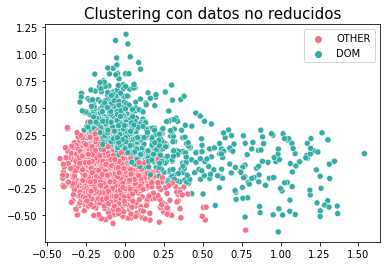

In [29]:
## Obtener modelo y predicciones con la función creada
kmeans, yPredictRaw, palette = clustering_kmeans(2, scaledSet)

## Asignación de clases
class_corr = [[0, 1], ['OTHER', 'DOM']]
classesTag = ['DOM' if i == class_corr[0][0] else 'OTHER' if i == class_corr[0][1] else i for i in yPredictRaw]
classesTag = np.array(classesTag)

sns.scatterplot(dataPCA[:,0], dataPCA[:,1], hue = classesTag, legend = 'full', palette = palette)
plt.title('Clustering con datos no reducidos', size=15)

In [30]:
## Matriz de confusión
pd.crosstab(labels, yPredictRaw, dropna = False, rownames = ['True'], colnames = ['Pred'])

Pred,0,1
True,,
0,221,107
1,671,1229


## Evaluación con "silhouette method"

In [31]:
silhouettes = []

## Ajustamos modelos desde k = 2 hasta k = 12
for n in range(2, 12):
    ## Ajustamos el modelo con el valor de k de cada iteracion
    kmeans, yPredictRaw, palette = clustering_kmeans(n, scaledSet)
    silhouette = silhouette_score(scaledSet, yPredictRaw)
    silhouettes.append(silhouette)


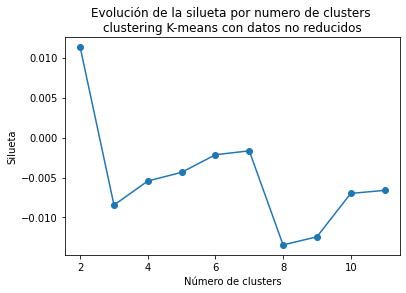

In [33]:
## Graficamos
fig, ax = plt.subplots(1, 1)
ax.plot(range(2, 12), silhouettes, marker = 'o')
ax.set_title("Evolución de la silueta por numero de clusters \nclustering K-means con datos no reducidos")
ax.set_xlabel('Número de clusters')
ax.set_ylabel('Silueta');

## Clustering con método K-Means de datos reducidos 

/usr/local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Clustering con datos reducidos')

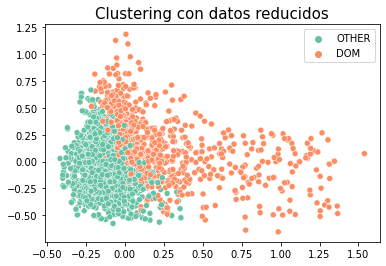

In [34]:
## Obtener modelo y predicciones con la función creada
kmeans, yPredictPCA, palette = clustering_kmeans(2, dataPCA)

## Asignación de clases
class_corr = [[0, 1], ['OTHER', 'DOM']]
classesTag = ['DOM' if i == class_corr[0][0] else 'OTHER' if i == class_corr[0][1] else i for i in yPredictPCA]
classesTag = np.array(classesTag)

palette = sns.color_palette("Set2", 2)
sns.scatterplot(dataPCA[:,0], dataPCA[:,1], hue = classesTag, legend = 'full', palette = palette)
plt.title('Clustering con datos reducidos', size=15)

In [35]:
## Matriz de confusión
pd.crosstab(labels, yPredictPCA, dropna = False, rownames = ['True'], colnames = ['Pred'])

Pred,0,1
True,,
0,222,106
1,542,1358


## Evaluación con "silhouette method"

In [36]:
silhouettes = []

## Ajustamos modelos desde k = 2 hasta k = 12
for n in range(2, 12):
    ## Ajustamos el modelo con el valor de k de cada iteracion
    kmeans, yPredictPCA, palette = clustering_kmeans(n, dataPCA)
    silhouette = silhouette_score(dataPCA, yPredictPCA)
    silhouettes.append(silhouette)


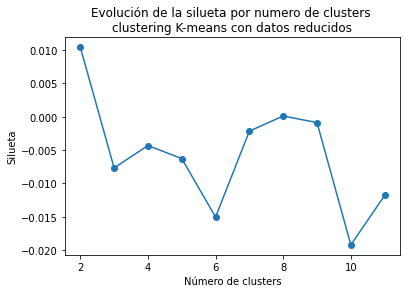

In [37]:
## Graficamos
fig, ax = plt.subplots(1, 1)
ax.plot(range(2, 12), silhouettes, marker = 'o')
ax.set_title("Evolución de la silueta por numero de clusters \nclustering K-means con datos reducidos")
ax.set_xlabel('Número de clusters')
ax.set_ylabel('Silueta');

# Clusterización por método Jerárquico

In [38]:
## Creamos funcion que ajuste los modelos de forma automatica
def hierarchical_clustering(data):
    np.random.seed(42)
    hierchclust = AgglomerativeClustering(affinity = 'euclidean', distance_threshold = 0, n_clusters = None)  # El parametro distance_threshold = 0 hace que se forme un cluster por observacion
    
    # Predecir las clases
    y_predict = hierchclust.fit_predict(X = data)
    
    # Obtener el numero de clusters con el metodo .n_clusters_
    nclust = hierchclust.n_clusters_ 
    
    # Devolvemos el modelo, las predicciones y el numero de clusters
    return(hierchclust, y_predict, nclust)

In [39]:
## Funcion para crear un dendrograma
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)
    # Plot
    dendrogram(linkage_matrix, **kwargs)

## Clustering con método Jerárquico de no datos reducidos 

In [41]:
## Clusterización de los datos por método Jerárquico

hierchclust, y_predict, nclust = hierarchical_clustering(scaledSet)
print(f'Número de clusters: {nclust}')

Número de clusters: 2228


Text(0.5, 1.0, 'Clustering jerárquico con threshold 0 \nde datos no reducidos')

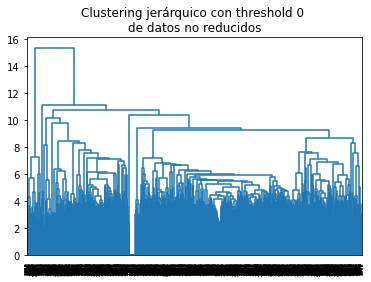

In [48]:
## Graficar
# Especificiar el parametro color_threshold a 0, de este modo, cada observacion es un cluster

fig, ax = plt.subplots(1, 1)
plot_dendrogram(hierchclust, color_threshold = 0, ax = ax)
ax.set_title("Clustering jerárquico con threshold 0 \nde datos no reducidos")

Text(0.5, 1.0, 'Clustering jerárquico con threshold 14 \nde datos no reducidos')

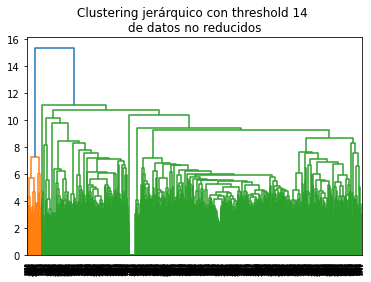

In [49]:
fig, ax = plt.subplots(1, 1)
plot_dendrogram(hierchclust, color_threshold = 14, ax = ax)
ax.set_title("Clustering jerárquico con threshold 14 \nde datos no reducidos")

## Clustering con método Jerárquico de datos reducidos 

In [50]:
## Clusterización de los datos por método Jerárquico

hierchclust, y_predict, nclust = hierarchical_clustering(dataPCA)
print(f'Número de clusters: {nclust}')

Número de clusters: 2228


Text(0.5, 1.0, 'Clustering jerárquico con threshold 0 \nde datos reducidos')

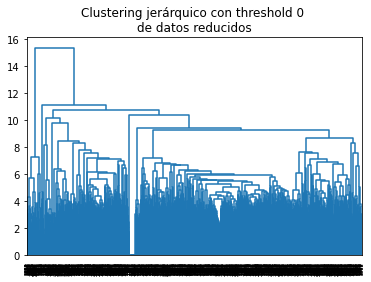

In [51]:
## Graficar
# Especificiar el parametro color_threshold a 0, de este modo, cada observacion es un cluster

fig, ax = plt.subplots(1, 1)
plot_dendrogram(hierchclust, color_threshold = 0, ax = ax)
ax.set_title("Clustering jerárquico con threshold 0 \nde datos reducidos")

Text(0.5, 1.0, 'Clustering jerárquico con threshold 14 \nde datos reducidos')

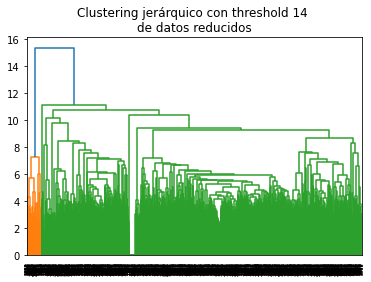

In [52]:
fig, ax = plt.subplots(1, 1)
plot_dendrogram(hierchclust, color_threshold = 14, ax = ax)
ax.set_title("Clustering jerárquico con threshold 14 \nde datos reducidos")